In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
#from sklearn.metrics import plot_confusion_matrix


In [24]:
def importdata():
    balance_data = pd.read_csv('diabetes.csv',sep= ',', header = None) 
    #the dataset has to be in the same folder as the Termwork_3.ipynb file is present 
    #else the path needs to be changed
    head = balance_data.head()
    balance_data = balance_data.drop(index = 0)
    # Printing the dataswet shape
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
      
    # Printing the dataset obseravtions
    print("Dataset: ",balance_data.head())
    return balance_data

In [25]:
# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, :8]
    #the target variable here is the variable which shows whether the patients has diabetes or no
    #1 if they have it and 0 if they don't 
    Y = balance_data.values[:, 8:9]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test

In [26]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [27]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [28]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [29]:
# Function to calculate accuracy
def cal_accuracy(clf,y_test, y_pred):
      
    print("Confusion Matrix: ")
    
   # plot_confusion_matrix(clf, X_test, y_test)  
    #plt.show()
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [30]:
# Building Phase
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
# Operational Phase
#print("Results Using Gini Index:")
      
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(clf_gini,y_test, y_pred_gini)
print(y_pred_gini)

# pred1 = 0
# pred0 = 0
# true1 = 0 
# true0 = 0 
# for y in y_pred_gini:
#     if(y == "1"):
#         pred1 = pred1 + 1
#     else:
#         pred0 = pred0 + 1
# for y in y_test:    
#     if(y == "1"):
#         true1 = true1 + 1
#     else:
#         true0 = true0 + 1

# print("prediction 0: " , pred0)
# print("prediction 1: " , pred1)
# print("true 0: " , true0)
# print("true 1: " , true1)

Dataset Length:  768
Dataset Shape:  (768, 9)
Dataset:     0    1   2   3    4     5      6   7  8
1  6  148  72  35    0  33.6  0.627  50  1
2  1   85  66  29    0  26.6  0.351  31  0
3  8  183  64   0    0  23.3  0.672  32  1
4  1   89  66  23   94  28.1  0.167  21  0
5  0  137  40  35  168  43.1  2.288  33  1
Predicted values:
['0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '0'
 '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0

<Figure size 432x288 with 0 Axes>

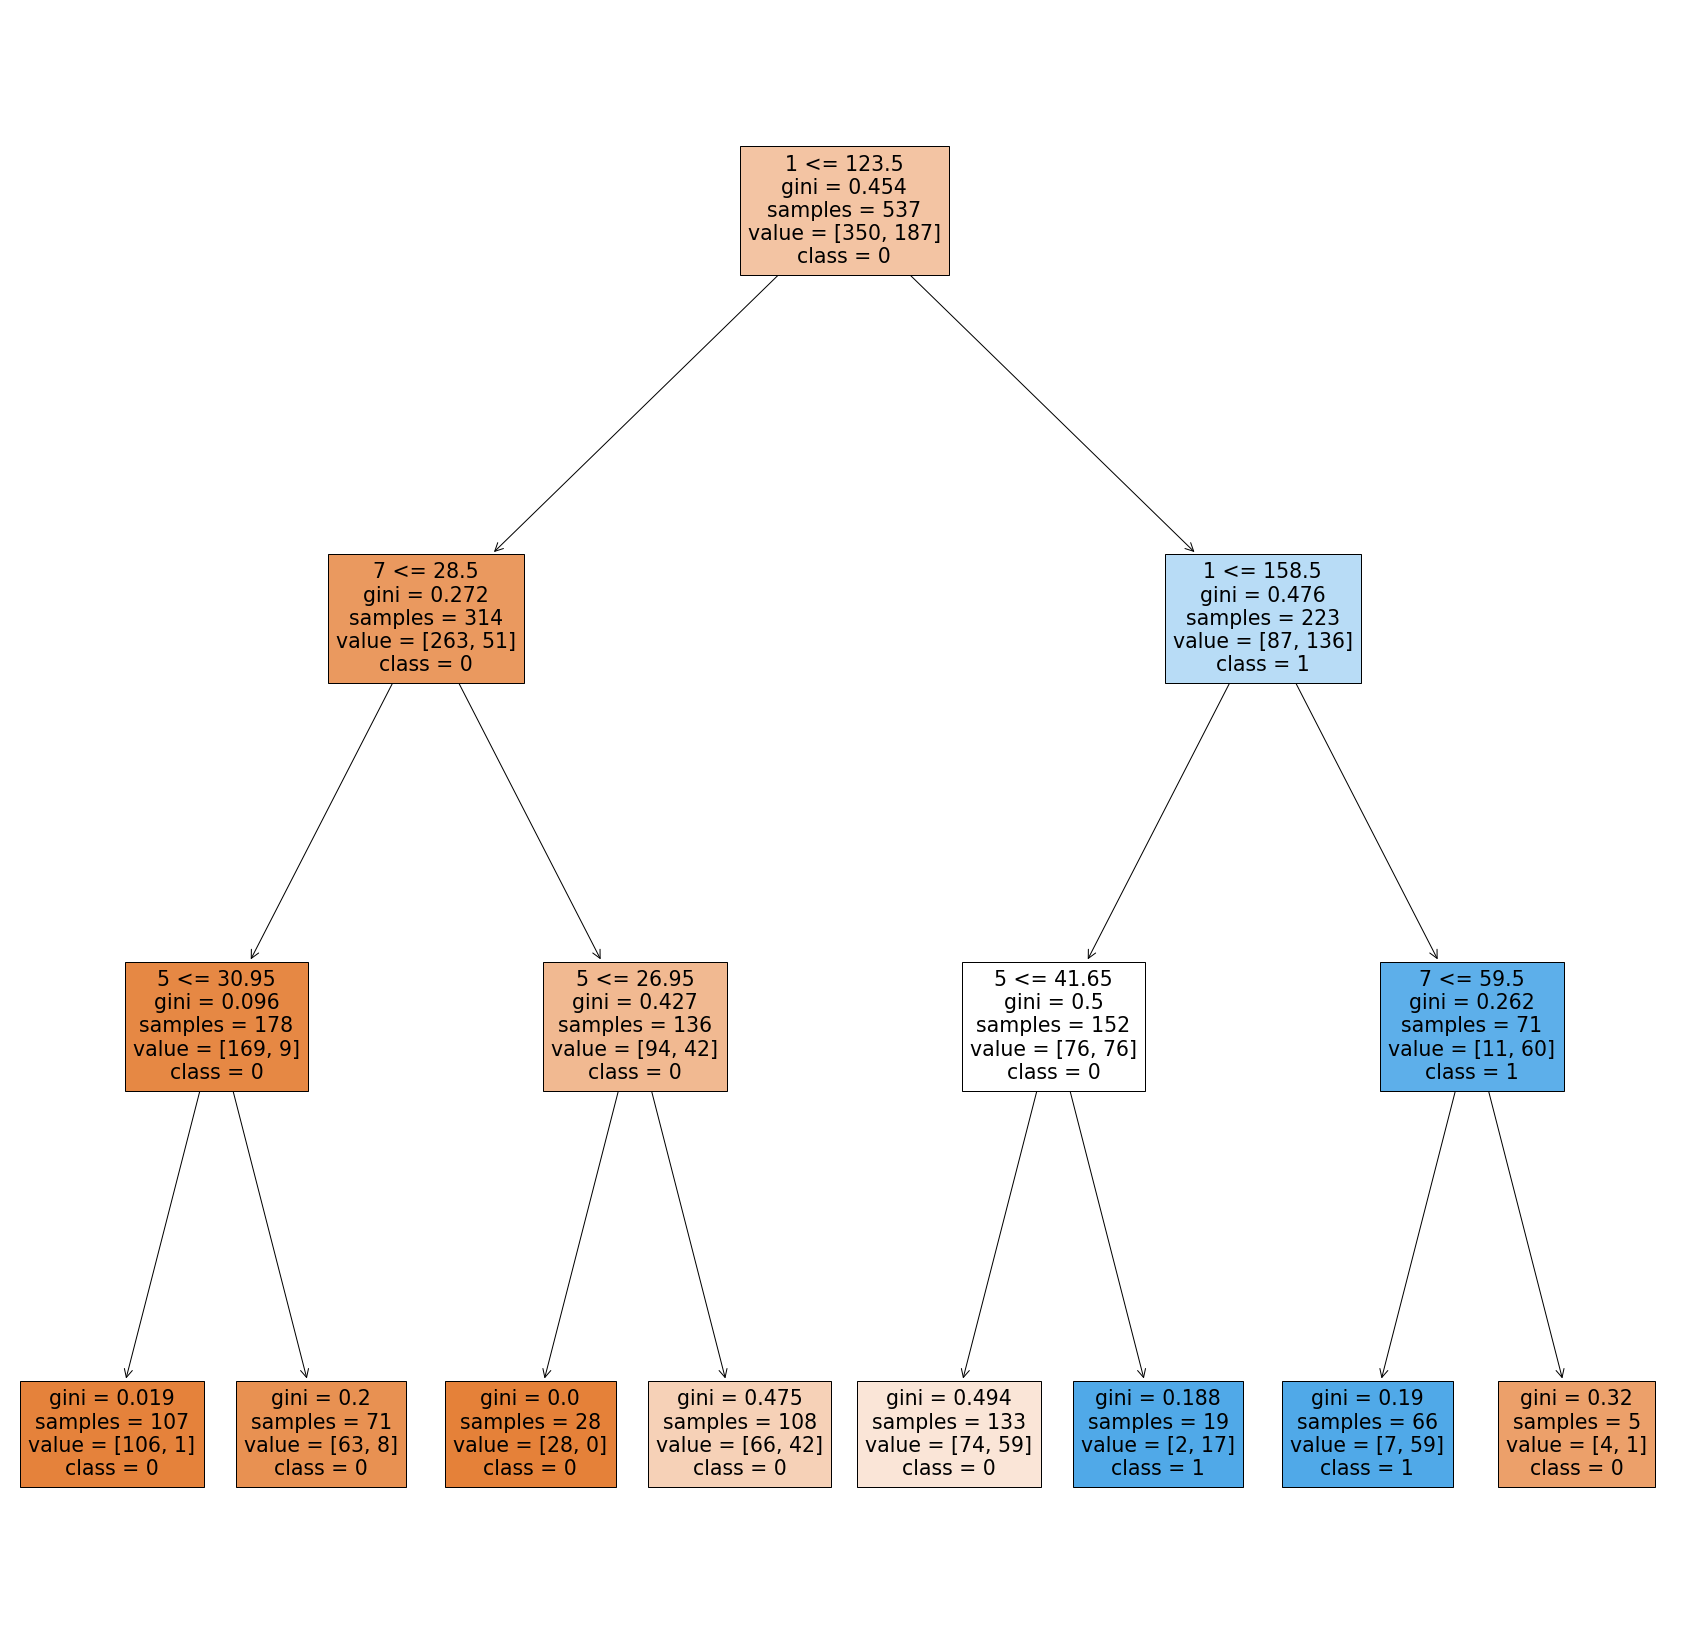

In [31]:
plt.figure()
plt.figure(figsize=(30, 30))
tree.plot_tree(clf_gini, feature_names = data.columns, class_names = ['0','1'],filled=True)
plt.show()


In [32]:
print("Results Using Entropy:")
 #Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(clf_entropy,y_test, y_pred_entropy)
pred1 = 0
pred0 = 0
true1 = 0 
true0 = 0 
for y in y_pred_entropy:
    if(y == "1"):
        pred1 = pred1 + 1
    else:
        pred0 = pred0 + 1
for y in y_test:    
    if(y == "1"):
        true1 = true1 + 1
    else:
        true0 = true0 + 1

print("prediction 0: " , pred0)
print("prediction 1: " , pred1)
print("true 0: " , true0)
print("true 1: " , true1)

Results Using Entropy:
Predicted values:
['0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '0'
 '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0']
Confusion Matrix: 
Ac

<Figure size 432x288 with 0 Axes>

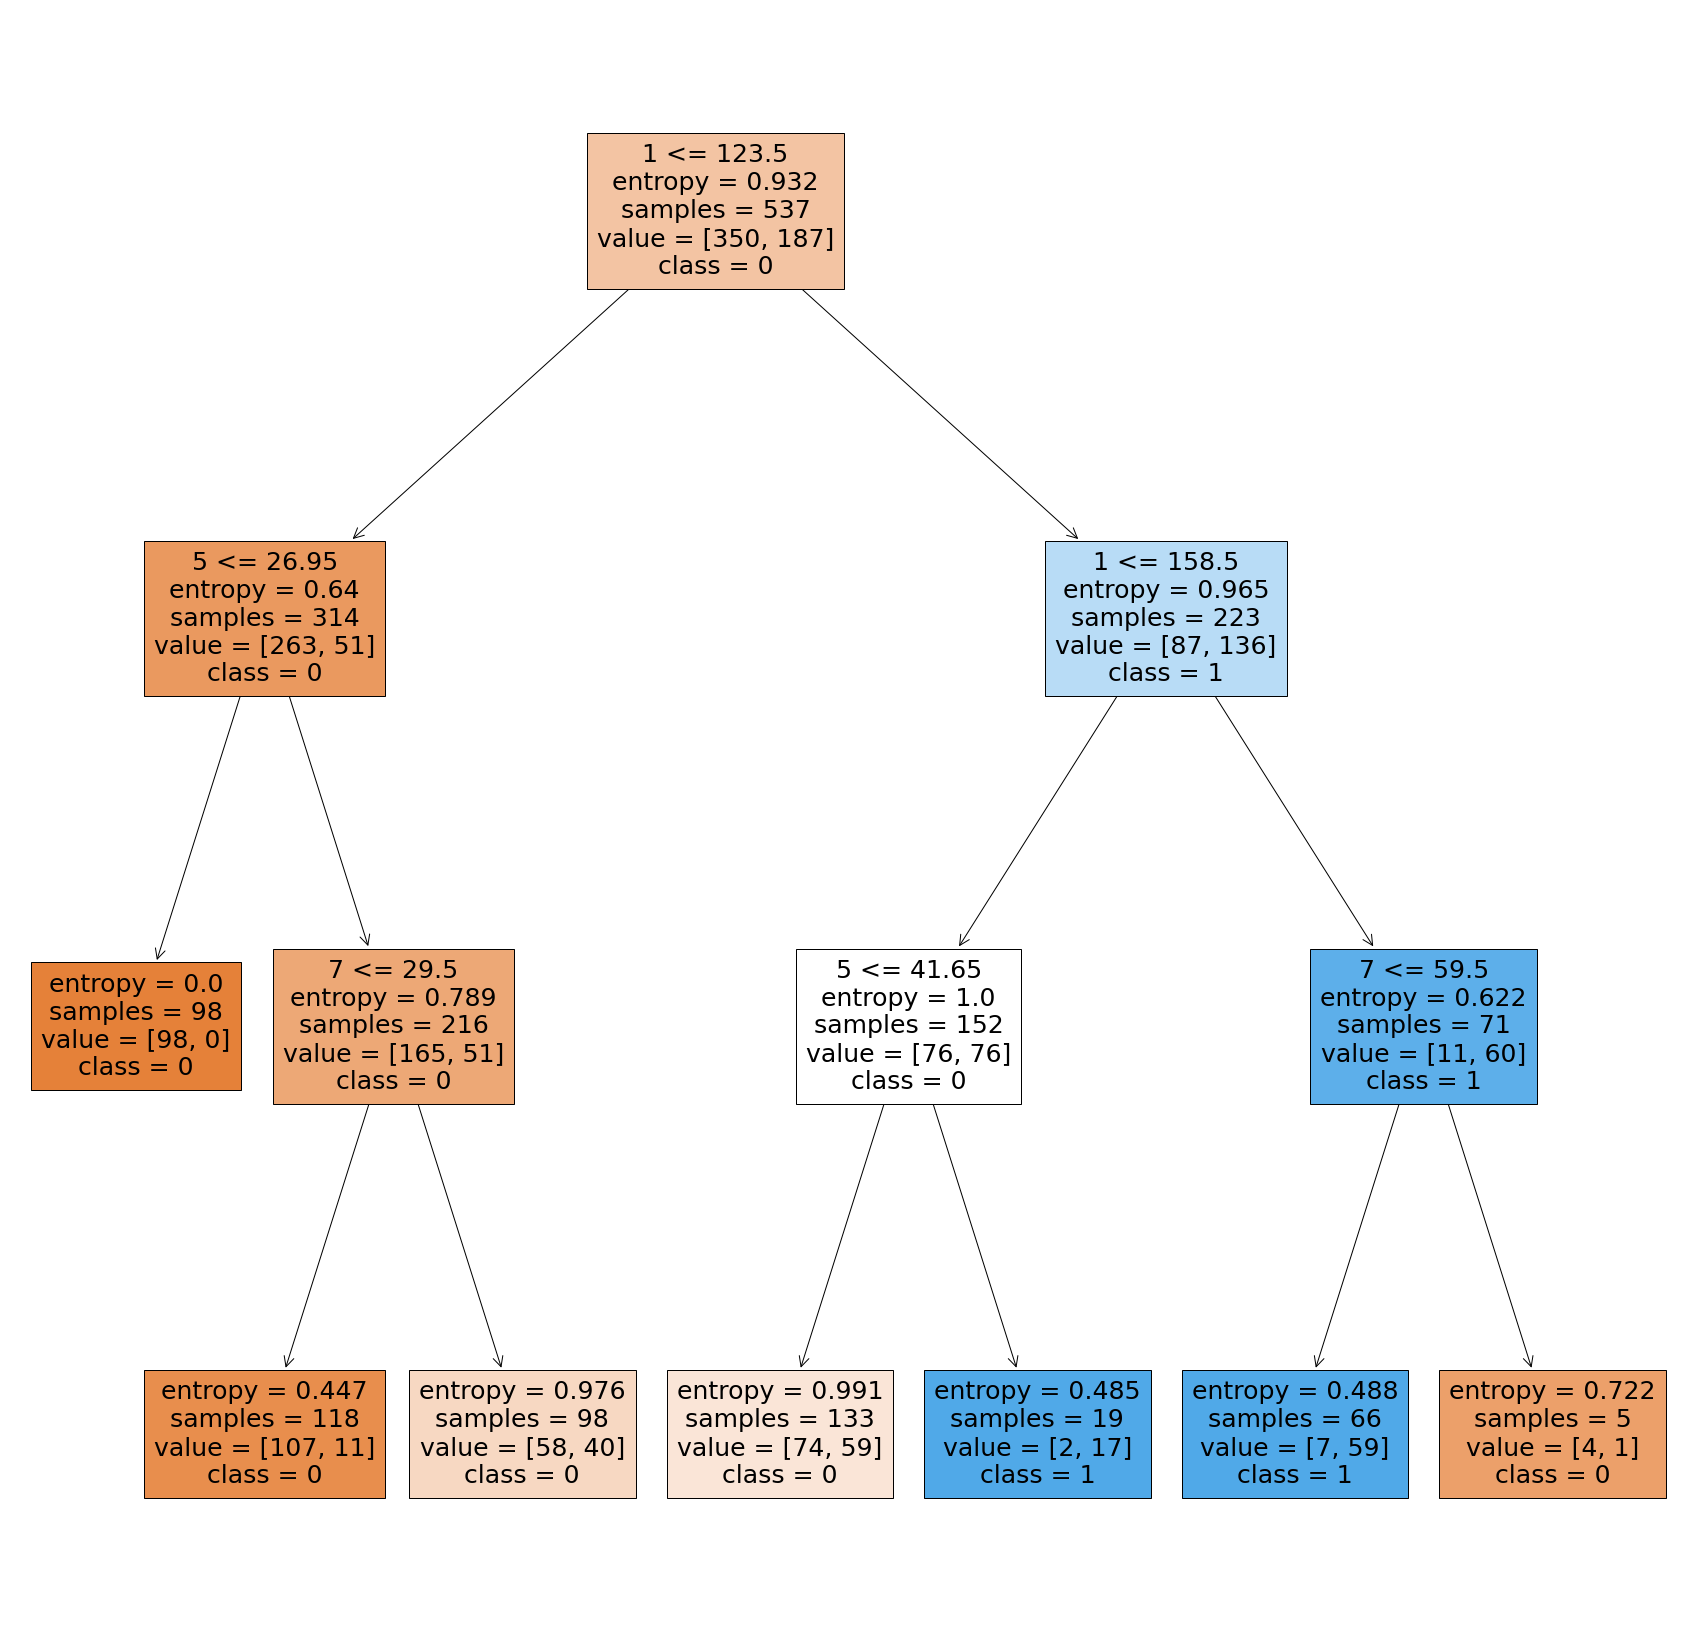

In [33]:
plt.figure()
plt.figure(figsize=(30, 30))
tree.plot_tree(clf_entropy, feature_names = data.columns, class_names = ['0','1'],filled=True)
plt.show()
